In [1]:
# Import necessary libraries
import torch  # PyTorch library for deep learning
from torch import nn  # nn module contains various building blocks
                     # for your neural networks.
import matplotlib.pyplot as plt  # Library for creating static, animated,
                                 # and interactive visualizations in Python
import numpy as np  # Library for Python, adding support for large,
                   # multi-dimensional arrays and matrices, along with a
                   # large collection of high-level mathematical functions
                   # to operate on these arrays.

# Check PyTorch version and whether CUDA is available
# torch.__version__ returns the version of PyTorch being used
# torch.cuda.is_available() checks and returns a Boolean True if a GPU
# is available, else it returns False
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

# Make the code device agnostic
# If CUDA is available, use CUDA (GPU); otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# If the device is CUDA, print the name of the device and display the CUDA details
if device.type == 'cuda':
    print("CUDA device name:", torch.cuda.get_device_name(0))
    # Get and print the name of the CUDA device
    !nvidia-smi
    # nvidia-smi command line utility, provides monitoring and management
    # capabilities for each of NVIDIA's Tesla, Quadro, GRID and GeForce
    # devices from Fermi and higher architecture families.

PyTorch version: 2.1.0+cu121
CUDA available: True
CUDA device name: NVIDIA GeForce GTX 1660 Ti
Fri Nov 10 04:19:13 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.05              Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     On  | 00000000:01:00.0  On |                  N/A |
| N/A   38C    P8               4W /  80W |    251MiB /  6144MiB |     23%      Default |
|                                         |                    

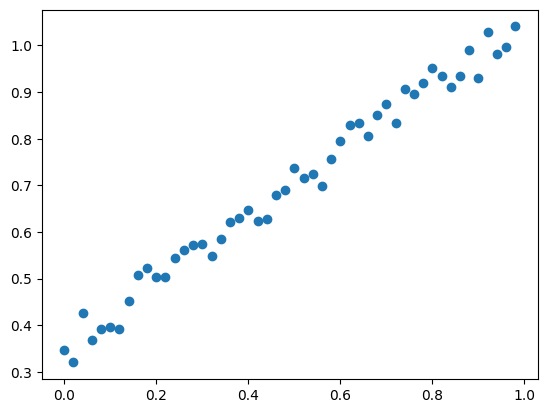

In [2]:
# Define "known" parameters for our model
# These are the parameters that our model will attempt to learn
weight = 0.7  # The weight parameter for our linear model
bias = 0.3  # The bias parameter for our linear model

# Generate data
start = 0  # The start of the range of our input features
end = 1  # The end of the range of our input features
step = .02  # The step size for creating our input features

# Create a tensor 'X' with values from 'start' to 'end' with a step of 'step'
# The 'unsqueeze' function is used to add an extra dimension to the tensor
X = torch.arange(start, end, step).unsqueeze(1)

# Generate 'y' values for each 'x' in 'X' using the linear equation y = weight*X + bias
# Add some random noise to 'y' values for making the task more challenging
y = weight*X + bias + torch.rand(X.size())*0.1

# Plot the generated data
# 'X' values are on the x-axis and corresponding 'y' values are on the y-axis
plt.scatter(X, y)

In [3]:
# Determine the split point for 80% of the data
train_split = int(.8*len(X))

# Split the data into training and testing sets
# The first 80% of the data is used for training
X_train = X[:train_split]  # :train_split means from start to train_split
y_train = y[:train_split]  # Corresponding labels for the training data

# The remaining 20% of the data is used for testing
X_test = X[train_split:]  # train_split: means from train_split to the end
y_test = y[train_split:]  # Corresponding labels for the testing data

# Print the number of data points in the training and testing sets
print("Training set length:", len(X_train), len(y_train))
print("Testing set length:", len(X_test), len(y_test))

Training set length: 40 40
Testing set length: 10 10


In [4]:
import matplotlib.pyplot as plt

def plot_prediction(X_train, y_train, X_test, y_test, X_pred=None, y_pred=None):
    """
    This function plots the training data, test data and predictions.

    Parameters:
    X_train (Tensor): The training data features
    y_train (Tensor): The training data labels
    X_test (Tensor): The test data features
    y_test (Tensor): The test data labels
    X_pred (Tensor, optional): The data features for which predictions have been made
    y_pred (Tensor, optional): The predictions for X_pred

    Returns:
    None
    """

    # If any of the parameters are on a GPU, we need to move them to the CPU
    # This is because matplotlib, which we use for plotting, can only work with data on the CPU
    tensors = [X_train, y_train, X_test, y_test, X_pred, y_pred]
    for i, tensor in enumerate(tensors):
        if tensor is not None and tensor.is_cuda:
            tensors[i] = tensor.cpu()

    X_train, y_train, X_test, y_test, X_pred, y_pred = tensors

    # Plot the training data in red
    plt.plot(X_train.numpy(), y_train.numpy(), 'ro', label='Train')

    # Plot the test data in blue
    plt.plot(X_test.numpy(), y_test.numpy(), 'bo', label='Test')

    # If predictions have been provided, plot them in green
    if X_pred is not None and y_pred is not None:
        plt.plot(X_pred.numpy(), y_pred.numpy(), 'go', label='Prediction')

    # Add a legend to explain which color corresponds to which data set
    plt.legend()

    # Display the plot
    plt.show()

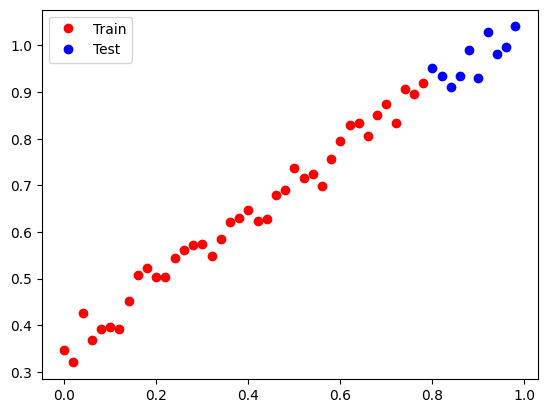

In [5]:
plot_prediction(X_train,y_train,X_test,y_test)

In [6]:
# Define a class for a linear model by subclassing nn.Module
# nn.Module is the base class for all neural network modules in PyTorch
class LinearModel_v2(nn.Module):
    def __init__(self):

        super().__init__()  # Call the constructor of the parent class nn.Module
        # Define a linear layer with one input feature and one output feature
        # The bias term is included by default
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)

    # Define the forward pass of the model
    # The forward pass defines how the model processes input data
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Pass the input through the linear layer
        return self.linear(x)

    # Define a method to move the model to a device
    # This method moves all parameters and buffers of the model to the specified device
    def to(self, device):
        # Move the linear layer to the specified device (CPU or GPU)
        self.linear = self.linear.to(device)
        return self  # Return the model itself for possible chaining of operations


In [7]:

# Set the seed for generating random numbers
# This ensures that the random numbers are the same every time the code is run
# This is useful for debugging and ensuring that your results are reproducible
torch.manual_seed(42)

# Create an instance of the LinearModel_v2 class
# This will initialize the parameters of the model (the weights and bias)
model_2 = LinearModel_v2()

# Print the model and its initial state
# model_2.state_dict() returns a Python dictionary object
# where each key is a string and value is a tensor.
# For our linear model, the keys are the names of the layers
# and the values are the weights and biases of these layers.
model_2, model_2.state_dict()

model_2 = model_2.to(device)  # Move the model to the device (CPU or GPU)


In [8]:
# Transport data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

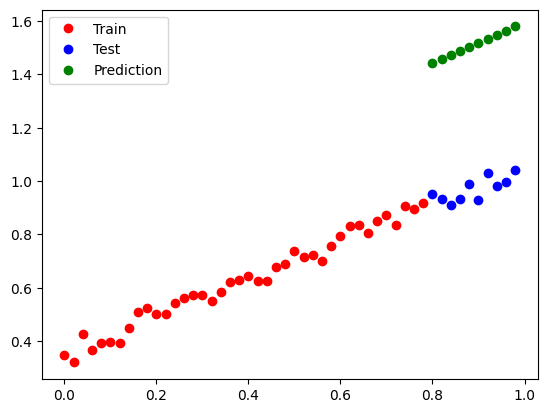

In [9]:
# Switch to inference mode. This will disable gradient computation, which can save memory.
# This is useful when you're only doing forward passes, like during model evaluation or prediction.
with torch.inference_mode():
    # Make a prediction on the test data using the model
    y_pred = model_2(X_test)
    # Plot the training data, test data, and the model's predictions on the test data
    plot_prediction(X_train, y_train, X_test, y_test, X_test, y_pred)

In [10]:
# Create the loss function
# We use Mean Squared Error (MSE) loss for our regression problem
# nn.MSELoss creates a criterion that measures the mean squared error
# between each element in the input 'x' and target 'y'
loss_fn = nn.MSELoss()

# Create the optimizer
# We use Stochastic Gradient Descent (SGD) as our optimization algorithm
# torch.optim.SGD takes as input the parameters of the model (obtained with model_2.parameters())
# and the learning rate, and returns an optimizer object
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [11]:
def train_model(model : LinearModel_v2, loss_fn, optimizer, X_train, y_train, X_test, y_test, epochs=1000):
    """
    Train a PyTorch model with the given parameters.

    Args:
        model (nn.Module): The PyTorch model to train.
        loss_fn (nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        X_train (torch.Tensor): The training data.
        y_train (torch.Tensor): The training labels.
        X_test (torch.Tensor): The testing data.
        y_test (torch.Tensor): The testing labels.
        epochs (int, optional): The number of epochs to train for. Defaults to 1000.

    Returns:
        dict: A dictionary containing the trained model and the loss values for each epoch.
        {
            model: .
            loss_values: .
            test_loss_values: .
        }
    """
    # Step 1: Set the seed for generating random numbers
    torch.manual_seed(42)

    # Step 2: Initialize lists to store epoch count, loss values, and test loss values
    epoch_count = []
    loss_values = []
    test_loss_values = []

    # Step 3: Training loop
    for epoch in range(epochs):
        # Step 4: Set the model to training mode
        model.train()
        epoch_count.append(epoch)

        # Step 5: Forward pass - compute predicted y by passing x to the model
        y_pred = model(X_train)

        # Step 6: Compute loss
        loss = loss_fn(y_pred, y_train)
        loss_values.append(loss.item())

        # Step 7: Zero all of the gradients for the variables
        optimizer.zero_grad()

        # Step 8: Backward pass - compute gradient of the loss with respect to model parameters
        loss.backward()

        # Step 9: Update the weights
        optimizer.step()

        # Step 10: Switch model to evaluation mode
        model.eval()

        # Step 11: Disable gradient calculation
        with torch.inference_mode():
            # Step 12: Make predictions on the test set
            y_pred = model(X_test)

            # Step 13: Calculate the loss on the test set
            test_loss = loss_fn(y_pred, y_test)
            test_loss_values.append(test_loss.item())

        # Step 14: Print loss values every 10 epochs
        if(epoch % 10 == 0):
            print(f"Epoch:{epoch} | Loss:{loss.item():.4f} | Test Loss:{test_loss.item():.4f}")

    # Plot the training and test losses
    plt.plot(epoch_count, loss_values, 'r--')
    plt.plot(epoch_count, test_loss_values, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Step 15: Return the trained model and the loss values for each epoch
    return {'model': model, 'loss_values': loss_values, 'test_loss_values': test_loss_values}


In [12]:
def test_train_model():
    """
    This function tests the train_model function by creating dummy data
    and a simple linear model.
    It then trains the model using the train_model function and asserts
    that the model was trained for the correct number of epochs.
    """
    # Create dummy data for testing
    X_train = torch.randn(100, 1)
    y_train = torch.randn(100, 1)
    X_test = torch.randn(50, 1)
    y_test = torch.randn(50, 1)

    # Initialize a simple linear model, loss function, and optimizer
    model = LinearModel_v2()
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # Train the model
    results = train_model(model, loss_fn, optimizer, X_train, y_train, X_test, y_test, epochs=10)

    # Assert that the model was trained for the correct number of epochs
    assert len(results['loss_values']) == 10
    assert len(results['test_loss_values']) == 10

Epoch:0 | Loss:1.3181 | Test Loss:1.7193


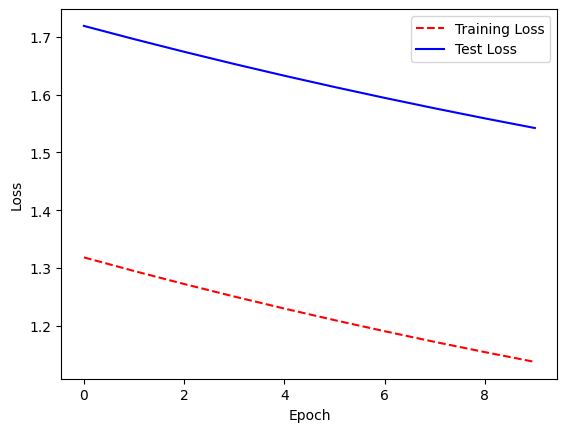

In [13]:
# Test the model
test_train_model()

Epoch:0 | Loss:0.2486 | Test Loss:0.1656
Epoch:10 | Loss:0.0027 | Test Loss:0.0008
Epoch:20 | Loss:0.0013 | Test Loss:0.0016
Epoch:30 | Loss:0.0012 | Test Loss:0.0015
Epoch:40 | Loss:0.0011 | Test Loss:0.0013
Epoch:50 | Loss:0.0010 | Test Loss:0.0011
Epoch:60 | Loss:0.0010 | Test Loss:0.0010
Epoch:70 | Loss:0.0009 | Test Loss:0.0009
Epoch:80 | Loss:0.0009 | Test Loss:0.0009
Epoch:90 | Loss:0.0008 | Test Loss:0.0008


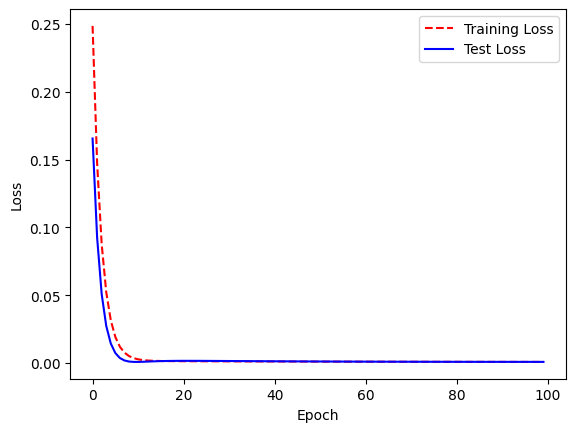

In [14]:
# Train the model
results = train_model(model_2, loss_fn, optimizer, X_train, y_train, X_test, y_test, epochs=100)
model_2= results['model']

In [15]:
model_2.state_dict()

OrderedDict([('linear.weight', tensor([[0.6715]], device='cuda:0')),
             ('linear.bias', tensor([0.3694], device='cuda:0'))])

In [16]:
# Save the model

# Define the path where the model will be saved

MODEL_NAME = '00_linear_model_v2.pt'
MODLE_PATH = '/tf-knugs/models/'

SAVE_PATH = MODLE_PATH + MODEL_NAME

# Save the model

torch.save(model_2.state_dict(), SAVE_PATH)


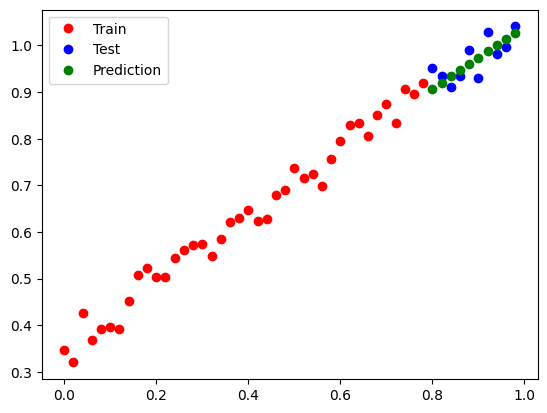

In [17]:
# Load and eval the model

# Define the path where the model is saved

MODEL_NAME = '00_linear_model_v2.pt'
MODLE_PATH = '/tf-knugs/models/'

LOAD_PATH = MODLE_PATH + MODEL_NAME

# Create an instance of the LinearModel_v2 class

model_3 = LinearModel_v2()
model_3.load_state_dict(torch.load(LOAD_PATH))
model_3 = model_3.to(device)

#evaluate the model

with torch.inference_mode():
    y_pred = model_3(X_test)
    plot_prediction(X_train, y_train, X_test, y_test, X_test, y_pred)
